# Figure 4 supplement

In [1]:
# env: add_hull_env

In [2]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
def get_f1_hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

def add_ID(df):
    df['ID'] = df['sample'] + '_' + df['cell_type'] + '_' + df['level'].astype(str) 
    return df

def process_hypergate_results_f1(df):
    df_f1 = df[(df['set_size'] == 'full')&(df['score'] == 'f1')]
    return df_f1
def process_hypergate_results_recall(df):
    df_recall = df[(df['set_size'] == 'full')&(df['score'] == 'recall')]
    return df_recall
def process_hypergate_results_precision(df):
    df_precision = df[(df['set_size'] == 'full')&(df['score'] == 'precision')]
    return df_precision

def get_best_hierarchy_string(temp_ID):
    tab = temp_ID[temp_ID.columns[0:5]]
    best_hierarchy = tab.columns[np.argmax(tab.T['f1'])]
    return best_hierarchy

def make_best_hierarchy_df(df):
    unique_IDs = pd.unique(df['ID'])
    out = pd.DataFrame(columns = ['score', 'cell_type', 'sample', 'level', 'ID', 'best_hierarchy'])
    for ID in unique_IDs:
        temp_ID = df[df['ID'] == ID]
        temp_ID.index = temp_ID['score']
        best_hierarchy_ID = get_best_hierarchy_string(temp_ID)
        temp_ID['best_hierarchy'] = temp_ID[best_hierarchy_ID]
        out = out.append(temp_ID[['score', 'cell_type', 'sample', 'level', 'ID','best_hierarchy']])
    return out

# Oetjen

### ConvexGating 

In [4]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']


cluster_lvl5 = ['cluster_CD4+ CM T cell','cluster_CD4+ TEMRA','cluster_CD8+ CM T cell','cluster_CD8+ TE T cell','cluster_Double negative T cell','cluster_NK cell','cluster_Naive CD8+ T cell',
'cluster_CD4+ EM T cell','cluster_CD4+ TRM T cell','cluster_CD8+ EM T cell','cluster_CD8+ TRM T cell','cluster_Double positive T cell','cluster_Naive CD4+ T cell']

gating_dir_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl2_hull' 
oetjen_cg_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl2 = oetjen_cg_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl2['level'] = 'lvl2'

gating_dir_lvl3 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl3_hull' 
oetjen_cg_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl3 = oetjen_cg_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl3['level'] = 'lvl3'

gating_dir_lvl4 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl4_hull' 
oetjen_cg_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl4 = oetjen_cg_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl4['level'] = 'lvl4'

gating_dir_lvl5 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl5_hull' 
oetjen_cg_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl5 = oetjen_cg_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))

oetjen_cg_lvl2['tool'] = 'ConvexGating'
oetjen_cg_lvl2['level'] = 2

oetjen_cg_lvl3['tool'] = 'ConvexGating'
oetjen_cg_lvl3['level'] = 3

oetjen_cg_lvl4['tool'] = 'ConvexGating'
oetjen_cg_lvl4['level'] = 4

oetjen_cg_lvl5['tool'] = 'ConvexGating'
oetjen_cg_lvl5['level'] = 5

oetjen_cg_lvl2['cell_type'] = oetjen_cg_lvl2['cluster'].str[8:]
oetjen_cg_lvl3['cell_type'] = oetjen_cg_lvl3['cluster'].str[8:]
oetjen_cg_lvl4['cell_type'] = oetjen_cg_lvl4['cluster'].str[8:]
oetjen_cg_lvl5['cell_type'] = oetjen_cg_lvl5['cluster'].str[8:]

oetjen_cg_lvl2 = add_ID(oetjen_cg_lvl2)
oetjen_cg_lvl3 = add_ID(oetjen_cg_lvl3)
oetjen_cg_lvl4 = add_ID(oetjen_cg_lvl4)
oetjen_cg_lvl5 = add_ID(oetjen_cg_lvl5)

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'f1': 'f1_cg'})

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'recall': 'recall_cg'})

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'precision': 'precision_cg'})

### Linear SVM

In [5]:
oetjen_linear_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\performance_linsvm\\svm_linear\\Oetjen_data\\'

oetjen_linear_svm_sub_lv2 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl2_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv2 = oetjen_linear_svm_sub_lv2[oetjen_linear_svm_sub_lv2['celltype'] != 'not annotated']


oetjen_linear_svm_sub_lv3 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl3_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv3 = oetjen_linear_svm_sub_lv3[oetjen_linear_svm_sub_lv3['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv4 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl4_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv4 = oetjen_linear_svm_sub_lv4[oetjen_linear_svm_sub_lv4['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv5 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl5_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv5 = oetjen_linear_svm_sub_lv5[oetjen_linear_svm_sub_lv5['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv2['cell_type'] = oetjen_linear_svm_sub_lv2['celltype']
oetjen_linear_svm_sub_lv3['cell_type'] = oetjen_linear_svm_sub_lv3['celltype']
oetjen_linear_svm_sub_lv4['cell_type'] = oetjen_linear_svm_sub_lv4['celltype']
oetjen_linear_svm_sub_lv5['cell_type'] = oetjen_linear_svm_sub_lv5['celltype']

oetjen_linear_svm_sub_lv2['level'] = 2
oetjen_linear_svm_sub_lv3['level'] = 3
oetjen_linear_svm_sub_lv4['level'] = 4
oetjen_linear_svm_sub_lv5['level'] = 5 

oetjen_lin_svm_lvl2 = add_ID(oetjen_linear_svm_sub_lv2)
oetjen_lin_svm_lvl3 = add_ID(oetjen_linear_svm_sub_lv3)
oetjen_lin_svm_lvl4 = add_ID(oetjen_linear_svm_sub_lv4)
oetjen_lin_svm_lvl5 = add_ID(oetjen_linear_svm_sub_lv5)

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'f1': 'f1_lin_svm'})

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'recall': 'recall_lin_svm'})

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'precision': 'precision_lin_svm'})

In [6]:
oetjen_lin_svm_lvl5

,dataset,sample,celltype,subsample,f1_lin_svm,recall_lin_svm,precision_lin_svm,cell_type,level,ID
1,cytof_data_tmp,T,CD4+ EM T cell,50000,0.759394,0.688995,0.845815,CD4+ EM T cell,5,T_CD4+ EM T cell_5
2,cytof_data_tmp,T,NK cell,50000,0.980226,0.974433,0.986087,NK cell,5,T_NK cell_5
3,cytof_data_tmp,T,CD8+ TRM T cell,50000,0.892231,0.872549,0.912821,CD8+ TRM T cell,5,T_CD8+ TRM T cell_5
4,cytof_data_tmp,T,CD4+ CM T cell,50000,0.887391,0.887317,0.887465,CD4+ CM T cell,5,T_CD4+ CM T cell_5
5,cytof_data_tmp,T,CD8+ EM T cell,50000,0.888845,0.878174,0.899778,CD8+ EM T cell,5,T_CD8+ EM T cell_5
...,...,...,...,...,...,...,...,...,...,...
107,cytof_data_tmp,J,Double negative T cell,50000,0.746193,0.674312,0.835227,Double negative T cell,5,J_Double negative T cell_5
108,cytof_data_tmp,J,Double positive T cell,50000,0.708408,0.589286,0.887892,Double positive T cell,5,J_Double positive T cell_5
109,cytof_data_tmp,J,CD4+ TRM T cell,50000,0.721951,0.685185,0.762887,CD4+ TRM T cell,5,J_CD4+ TRM T cell_5
110,cytof_data_tmp,J,CD8+ TE T cell,50000,0.832258,0.777108,0.895833,CD8+ TE T cell,5,J_CD8+ TE T cell_5


### RBF svm

In [7]:
oetjen_rbf_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\performance_rbfsvm\\svm_rbf\\Oetjen_data\\'

oetjen_rbf_svm_sub_lvl2 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl2_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lvl2 = oetjen_rbf_svm_sub_lvl2[oetjen_rbf_svm_sub_lvl2['celltype'] != 'not annotated']


oetjen_rbf_svm_sub_lvl3 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl3_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lvl3 = oetjen_rbf_svm_sub_lvl3[oetjen_rbf_svm_sub_lvl3['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lvl4 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl4_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lvl4 = oetjen_rbf_svm_sub_lvl4[oetjen_rbf_svm_sub_lvl4['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lvl5 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl5_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lvl5 = oetjen_rbf_svm_sub_lvl5[oetjen_rbf_svm_sub_lvl5['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lvl2['cell_type'] = oetjen_rbf_svm_sub_lvl2['celltype']
oetjen_rbf_svm_sub_lvl3['cell_type'] = oetjen_rbf_svm_sub_lvl3['celltype']
oetjen_rbf_svm_sub_lvl4['cell_type'] = oetjen_rbf_svm_sub_lvl4['celltype']
oetjen_rbf_svm_sub_lvl5['cell_type'] = oetjen_rbf_svm_sub_lvl5['celltype']

oetjen_rbf_svm_sub_lvl2['level'] = 2
oetjen_rbf_svm_sub_lvl3['level'] = 3
oetjen_rbf_svm_sub_lvl4['level'] = 4
oetjen_rbf_svm_sub_lvl5['level'] = 5 


oetjen_rbf_svm_lvl2 = add_ID(oetjen_rbf_svm_sub_lvl2)
oetjen_rbf_svm_lvl3 = add_ID(oetjen_rbf_svm_sub_lvl3)
oetjen_rbf_svm_lvl4 = add_ID(oetjen_rbf_svm_sub_lvl4)
oetjen_rbf_svm_lvl5 = add_ID(oetjen_rbf_svm_sub_lvl5)

oetjen_rbf_svm_lvl2 = oetjen_rbf_svm_lvl2.rename(columns={'f1': 'f1_rbf_svm'})
oetjen_rbf_svm_lvl3 = oetjen_rbf_svm_lvl3.rename(columns={'f1': 'f1_rbf_svm'})
oetjen_rbf_svm_lvl4 = oetjen_rbf_svm_lvl4.rename(columns={'f1': 'f1_rbf_svm'})
oetjen_rbf_svm_lvl5 = oetjen_rbf_svm_lvl5.rename(columns={'f1': 'f1_rbf_svm'})

oetjen_rbf_svm_lvl2 = oetjen_rbf_svm_lvl2.rename(columns={'recall': 'recall_rbf_svm'})
oetjen_rbf_svm_lvl3 = oetjen_rbf_svm_lvl3.rename(columns={'recall': 'recall_rbf_svm'})
oetjen_rbf_svm_lvl4 = oetjen_rbf_svm_lvl4.rename(columns={'recall': 'recall_rbf_svm'})
oetjen_rbf_svm_lvl5 = oetjen_rbf_svm_lvl5.rename(columns={'recall': 'recall_rbf_svm'})

oetjen_rbf_svm_lvl2 = oetjen_rbf_svm_lvl2.rename(columns={'precision': 'precision_rbf_svm'})
oetjen_rbf_svm_lvl3 = oetjen_rbf_svm_lvl3.rename(columns={'precision': 'precision_rbf_svm'})
oetjen_rbf_svm_lvl4 = oetjen_rbf_svm_lvl4.rename(columns={'precision': 'precision_rbf_svm'})
oetjen_rbf_svm_lvl5 = oetjen_rbf_svm_lvl5.rename(columns={'precision': 'precision_rbf_svm'})

### visualize

In [8]:
comp_oetjen_lvl2_f1 = oetjen_cg_lvl2.merge(oetjen_lin_svm_lvl2, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_oetjen_lvl3_f1 = oetjen_cg_lvl3.merge(oetjen_lin_svm_lvl3, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_oetjen_lvl4_f1 = oetjen_cg_lvl4.merge(oetjen_lin_svm_lvl4, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_oetjen_lvl5_f1 = oetjen_cg_lvl5.merge(oetjen_lin_svm_lvl5, on = 'ID')[['f1_lin_svm','f1_cg']]

comp_oetjen_lvl2_precision = oetjen_cg_lvl2.merge(oetjen_lin_svm_lvl2, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_oetjen_lvl3_precision = oetjen_cg_lvl3.merge(oetjen_lin_svm_lvl3, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_oetjen_lvl4_precision = oetjen_cg_lvl4.merge(oetjen_lin_svm_lvl4, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_oetjen_lvl5_precision = oetjen_cg_lvl5.merge(oetjen_lin_svm_lvl5, on = 'ID')[['precision_lin_svm','precision_cg']]

comp_oetjen_lvl2_recall = oetjen_cg_lvl2.merge(oetjen_lin_svm_lvl2, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_oetjen_lvl3_recall = oetjen_cg_lvl3.merge(oetjen_lin_svm_lvl3, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_oetjen_lvl4_recall = oetjen_cg_lvl4.merge(oetjen_lin_svm_lvl4, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_oetjen_lvl5_recall = oetjen_cg_lvl5.merge(oetjen_lin_svm_lvl5, on = 'ID')[['recall_lin_svm','recall_cg']]

#### CG vs. hypergate

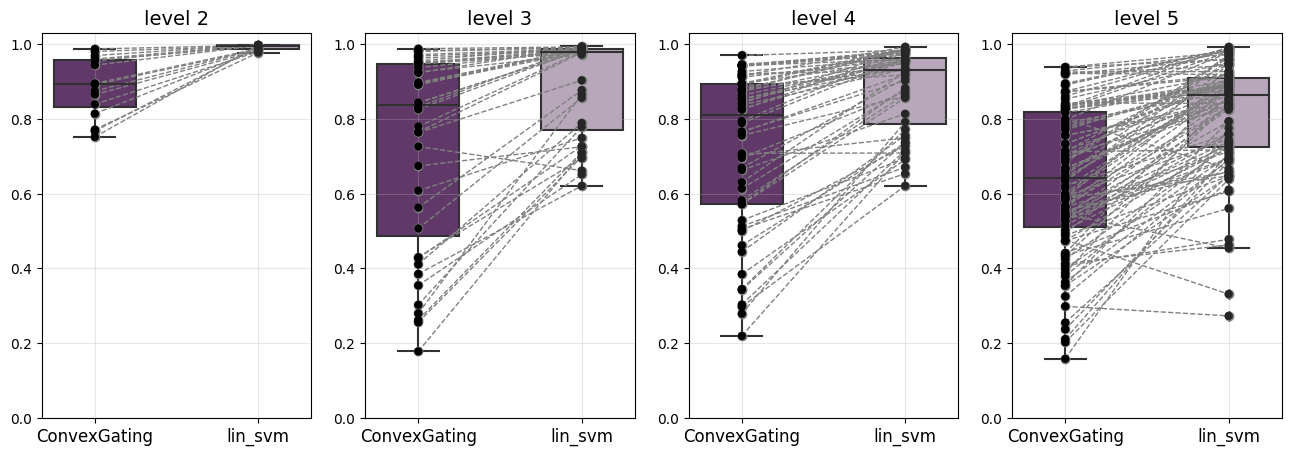

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen f1
sns.boxplot(data=comp_oetjen_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_f1)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_f1['f1_cg'][i], comp_oetjen_lvl2_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_f1)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_f1['f1_cg'][i], comp_oetjen_lvl3_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[2],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_f1)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_f1['f1_cg'][i], comp_oetjen_lvl4_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[3],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_f1)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_f1['f1_cg'][i], comp_oetjen_lvl5_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_oetjen_f1.pdf',bbox_inches='tight')

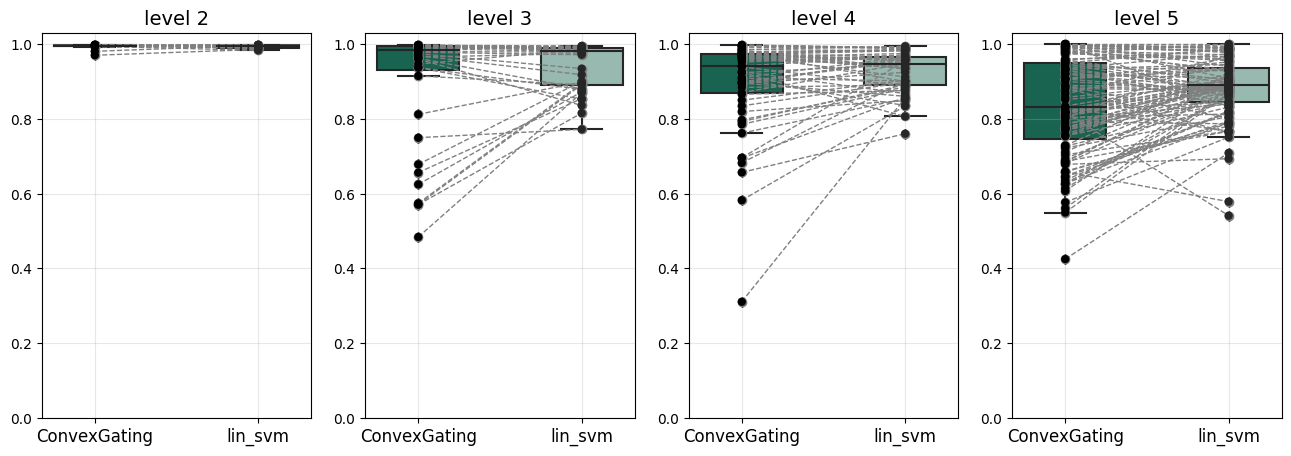

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen precision
sns.boxplot(data=comp_oetjen_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_precision)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_precision['precision_cg'][i], comp_oetjen_lvl2_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_precision)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_precision['precision_cg'][i], comp_oetjen_lvl3_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[2],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_precision)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_precision['precision_cg'][i], comp_oetjen_lvl4_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[3],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_precision)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_precision['precision_cg'][i], comp_oetjen_lvl5_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_oetjen_precision.pdf',bbox_inches='tight')

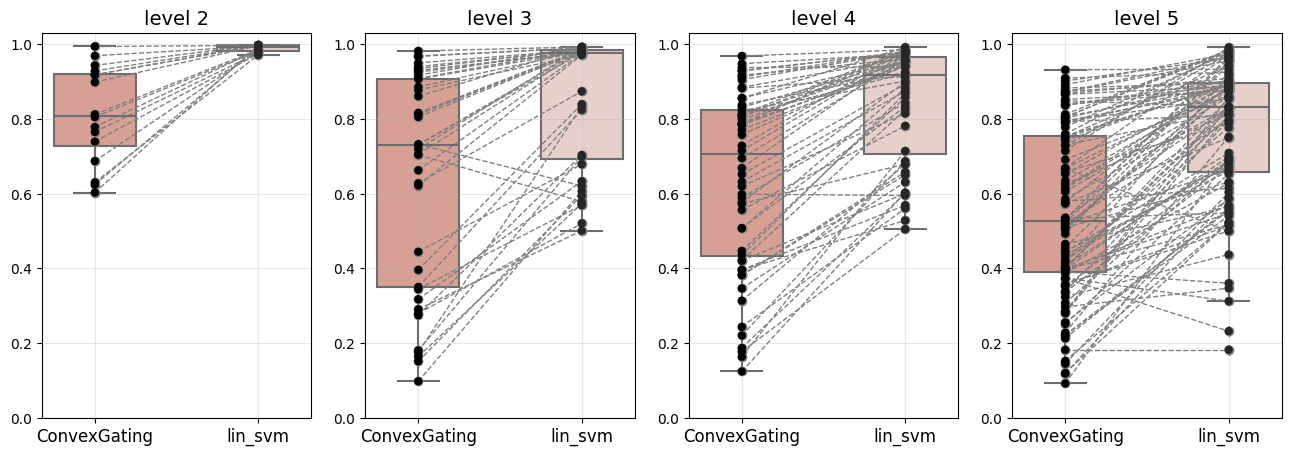

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen recall
sns.boxplot(data=comp_oetjen_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_recall)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_recall['recall_cg'][i], comp_oetjen_lvl2_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_recall)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_recall['recall_cg'][i], comp_oetjen_lvl3_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[2],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_recall)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_recall['recall_cg'][i], comp_oetjen_lvl4_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[3],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_recall)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_recall['recall_cg'][i], comp_oetjen_lvl5_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_oetjen_recall.pdf',bbox_inches='tight')

# Hofer

### ConvexGating 

In [12]:
hofer_cg_path_lvl1 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\updated_Figure_4\\benchmark_tables\\performance_summary_Hofer_level1 (1).csv'
hofer_cg_path_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\updated_Figure_4\\benchmark_tables\\performance_summary_Hofer_level2 (1).csv'

In [13]:
hofer_cg_lvl1 = pd.read_csv(hofer_cg_path_lvl1,index_col =0)
hofer_cg_lvl2 = pd.read_csv(hofer_cg_path_lvl2,index_col =0)

In [14]:
hofer_cg_lvl1['level'] = 1
add_ID(hofer_cg_lvl1)

hofer_cg_lvl1_processed = make_best_hierarchy_df(hofer_cg_lvl1)

hofer_cg_lvl1_processed_f1 = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'f1']
hofer_cg_lvl1_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
hofer_cg_lvl1_processed_f1['tool'] = 'ConvexGating'

hofer_cg_lvl1_processed_precision = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'precision']
hofer_cg_lvl1_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
hofer_cg_lvl1_processed_precision['tool'] = 'ConvexGating'

hofer_cg_lvl1_processed_recall = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'recall']
hofer_cg_lvl1_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
hofer_cg_lvl1_processed_recall['tool'] = 'ConvexGating'

hofer_cg_lvl1_processed = hofer_cg_lvl1_processed_f1.append(hofer_cg_lvl1_processed_precision).append(hofer_cg_lvl1_processed_recall)

In [15]:
hofer_cg_lvl2['level'] = 2
add_ID(hofer_cg_lvl2)

hofer_cg_lvl2_processed = make_best_hierarchy_df(hofer_cg_lvl2)

hofer_cg_lvl2_processed_f1 = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'f1']
hofer_cg_lvl2_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
hofer_cg_lvl2_processed_f1['tool'] = 'ConvexGating'

hofer_cg_lvl2_processed_precision = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'precision']
hofer_cg_lvl2_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
hofer_cg_lvl2_processed_precision['tool'] = 'ConvexGating'

hofer_cg_lvl2_processed_recall = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'recall']
hofer_cg_lvl2_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
hofer_cg_lvl2_processed_recall['tool'] = 'ConvexGating'

hofer_cg_lvl2_processed = hofer_cg_lvl2_processed_f1.append(hofer_cg_lvl2_processed_precision).append(hofer_cg_lvl2_processed_recall)

### Linear SVM

In [16]:
hofer_linear_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\updated_Figure_4\\benchmark_tables\\'

hofer_linear_svm_sub_lvl1 = pd.read_csv(hofer_linear_svm_path +
                                   'mono_merge_annotated_cell_types_linear_svm_sub_overview.csv',index_col = 0)
hofer_linear_svm_sub_lvl1 = hofer_linear_svm_sub_lvl1[hofer_linear_svm_sub_lvl1['celltype'] != 'not annotated']

hofer_linear_svm_sub_lvl1['cell_type'] = hofer_linear_svm_sub_lvl1['celltype']
hofer_linear_svm_sub_lvl1['level'] = 1
hofer_lin_svm_lvl1 = add_ID(hofer_linear_svm_sub_lvl1)
hofer_lin_svm_lvl1 = hofer_lin_svm_lvl1.rename(columns={'f1': 'f1_lin_svm'})
hofer_lin_svm_lvl1 = hofer_lin_svm_lvl1.rename(columns={'recall': 'recall_lin_svm'})
hofer_lin_svm_lvl1 = hofer_lin_svm_lvl1.rename(columns={'precision': 'precision_lin_svm'})

hofer_linear_svm_sub_lvl2 = pd.read_csv(hofer_linear_svm_path +
                                   'mono_merge_annotated_cell_types_lvl2_linear_svm_sub_overview.csv',index_col = 0)
hofer_linear_svm_sub_lvl2 = hofer_linear_svm_sub_lvl2[hofer_linear_svm_sub_lvl2['celltype'] != 'not annotated']

hofer_linear_svm_sub_lvl2['cell_type'] = hofer_linear_svm_sub_lvl2['celltype']
hofer_linear_svm_sub_lvl2['level'] = 2
hofer_lin_svm_lvl2 = add_ID(hofer_linear_svm_sub_lvl2)
hofer_lin_svm_lvl2 = hofer_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
hofer_lin_svm_lvl2 = hofer_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
hofer_lin_svm_lvl2 = hofer_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})

## Visualize 

In [17]:
comp_hofer_lvl1_f1 = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'f1'].merge(hofer_lin_svm_lvl1, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_hofer_lvl2_f1 = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'f1'].merge(hofer_lin_svm_lvl2, on = 'ID')[['f1_lin_svm','f1_cg']]

comp_hofer_lvl1_precision = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'precision'].merge(hofer_lin_svm_lvl1, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_hofer_lvl2_precision = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'precision'].merge(hofer_lin_svm_lvl2, on = 'ID')[['precision_lin_svm','precision_cg']]

comp_hofer_lvl1_recall = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'recall'].merge(hofer_lin_svm_lvl1, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_hofer_lvl2_recall = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'recall'].merge(hofer_lin_svm_lvl2, on = 'ID')[['recall_lin_svm','recall_cg']]

#### CG vs. lin svm

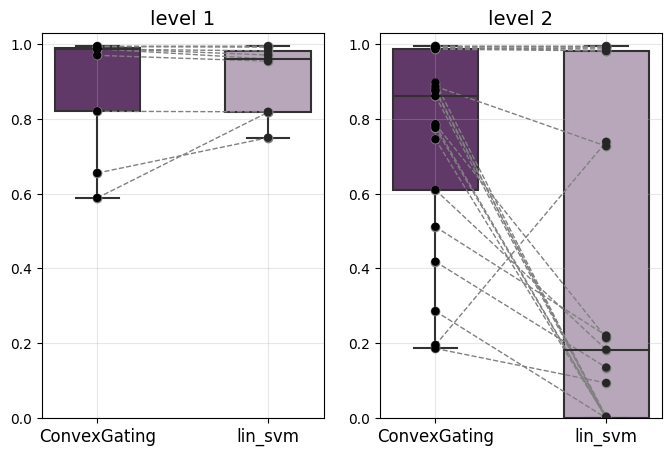

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer f1
sns.boxplot(data=comp_hofer_lvl1_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_f1)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_f1['f1_cg'][i], comp_hofer_lvl1_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_f1)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_f1['f1_cg'][i], comp_hofer_lvl2_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_hofer_f1.pdf',bbox_inches='tight')

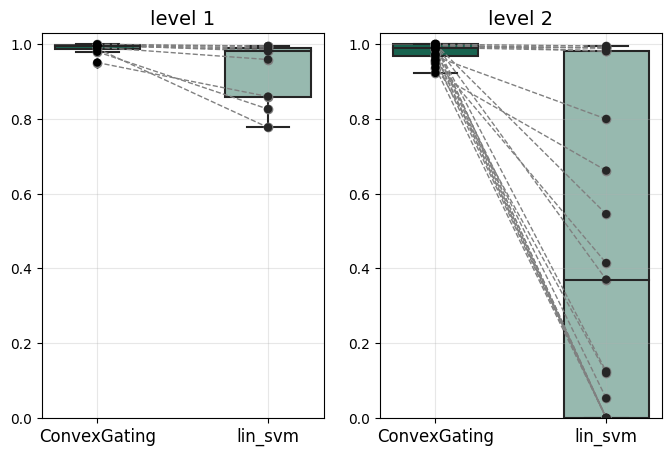

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer precision
sns.boxplot(data=comp_hofer_lvl1_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_precision)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_precision['precision_cg'][i], comp_hofer_lvl1_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_precision)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_precision['precision_cg'][i], comp_hofer_lvl2_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_hofer_precision.pdf',bbox_inches='tight')

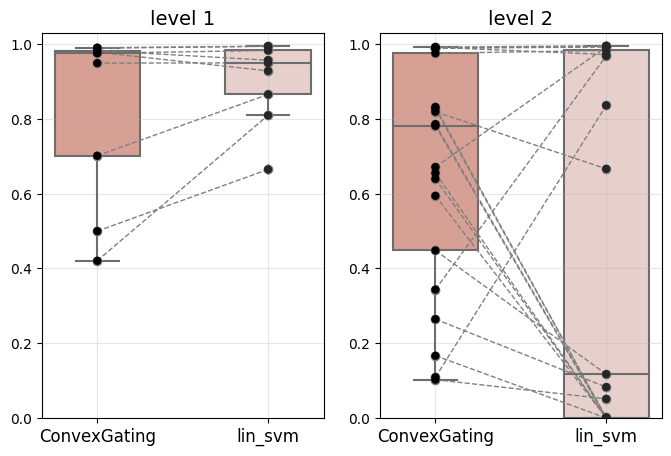

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer recall
sns.boxplot(data=comp_hofer_lvl1_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_recall)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_recall['recall_cg'][i], comp_hofer_lvl1_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_recall)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_recall['recall_cg'][i], comp_hofer_lvl2_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_hofer_recall.pdf',bbox_inches='tight')

# HIV

### ConvexGating

In [21]:
HIV_cg_path_lvl1 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\ConvexGating\\performance_summary_HIV_level1.csv'
HIV_cg_path_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\ConvexGating\\performance_summary_HIV_level2.csv'

In [22]:
columns_order = ['hierarchy_1', 'hierarchy_2', 'hierarchy_3', 'hierarchy_4', 'hierarchy_5', 'score', 'cell_type','sample']
HIV_cg_lvl1 = pd.read_csv(HIV_cg_path_lvl1,index_col =0)
HIV_cg_lvl2 = pd.read_csv(HIV_cg_path_lvl2,index_col =0)
HIV_cg_lvl1 = HIV_cg_lvl1[columns_order]
HIV_cg_lvl2 = HIV_cg_lvl2[columns_order]

In [23]:
pd.unique(HIV_cg_lvl2['sample']) 

array(['NL01', 'NL03', 'NL05', 'NL07', 'NL09'], dtype=object)

In [24]:
HIV_cg_lvl1['level'] = 1
add_ID(HIV_cg_lvl1)

HIV_cg_lvl1_processed = make_best_hierarchy_df(HIV_cg_lvl1)

HIV_cg_lvl1_processed_f1 = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'f1']
HIV_cg_lvl1_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
HIV_cg_lvl1_processed_f1['tool'] = 'ConvexGating'

HIV_cg_lvl1_processed_precision = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'precision']
HIV_cg_lvl1_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
HIV_cg_lvl1_processed_precision['tool'] = 'ConvexGating'

HIV_cg_lvl1_processed_recall = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'recall']
HIV_cg_lvl1_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
HIV_cg_lvl1_processed_recall['tool'] = 'ConvexGating'

HIV_cg_lvl1_processed = HIV_cg_lvl1_processed_f1.append(HIV_cg_lvl1_processed_precision).append(HIV_cg_lvl1_processed_recall)

In [25]:
HIV_cg_lvl1_processed

,score,cell_type,sample,level,ID,f1_cg,tool,precision_cg,recall_cg
f1,f1,B cell,NL01,1,NL01_B cell_1,0.930643,ConvexGating,NaN,NaN
f1,f1,B cell,NL03,1,NL03_B cell_1,0.948267,ConvexGating,NaN,NaN
f1,f1,B cell,NL05,1,NL05_B cell_1,0.890543,ConvexGating,NaN,NaN
f1,f1,B cell,NL07,1,NL07_B cell_1,0.924478,ConvexGating,NaN,NaN
f1,f1,B cell,NL09,1,NL09_B cell_1,0.807418,ConvexGating,NaN,NaN
...,...,...,...,...,...,...,...,...,...
recall,recall,T cell,NL01,1,NL01_T cell_1,NaN,ConvexGating,NaN,0.972902
recall,recall,T cell,NL03,1,NL03_T cell_1,NaN,ConvexGating,NaN,0.982769
recall,recall,T cell,NL05,1,NL05_T cell_1,NaN,ConvexGating,NaN,0.948374
recall,recall,T cell,NL07,1,NL07_T cell_1,NaN,ConvexGating,NaN,0.994028


In [26]:
HIV_cg_lvl2['level'] = 2
add_ID(HIV_cg_lvl2)

HIV_cg_lvl2_processed = make_best_hierarchy_df(HIV_cg_lvl2)

HIV_cg_lvl2_processed_f1 = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'f1']
HIV_cg_lvl2_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
HIV_cg_lvl2_processed_f1['tool'] = 'ConvexGating'

HIV_cg_lvl2_processed_precision = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'precision']
HIV_cg_lvl2_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
HIV_cg_lvl2_processed_precision['tool'] = 'ConvexGating'

HIV_cg_lvl2_processed_recall = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'recall']
HIV_cg_lvl2_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
HIV_cg_lvl2_processed_recall['tool'] = 'ConvexGating'

HIV_cg_lvl2_processed = HIV_cg_lvl2_processed_f1.append(HIV_cg_lvl2_processed_precision).append(HIV_cg_lvl2_processed_recall)

### Linear SVM 

In [27]:
HIV_linear_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\performance_linsvm\\svm_linear\\HIV_data\\'

HIV_linear_svm_sub_lvl1 = pd.read_csv(HIV_linear_svm_path +
                                   'HIV_data_annotated_cell_type_lvl_1_sub_linear_svm_overview.csv',index_col = 0)
HIV_linear_svm_sub_lvl1 = HIV_linear_svm_sub_lvl1[HIV_linear_svm_sub_lvl1['celltype'] != 'not annotated']

HIV_linear_svm_sub_lvl1['cell_type'] = HIV_linear_svm_sub_lvl1['celltype']
HIV_linear_svm_sub_lvl1['level'] = 1
HIV_lin_svm_lvl1 = add_ID(HIV_linear_svm_sub_lvl1)
HIV_lin_svm_lvl1 = HIV_lin_svm_lvl1.rename(columns={'f1': 'f1_lin_svm'})
HIV_lin_svm_lvl1 = HIV_lin_svm_lvl1.rename(columns={'recall': 'recall_lin_svm'})
HIV_lin_svm_lvl1 = HIV_lin_svm_lvl1.rename(columns={'precision': 'precision_lin_svm'})

HIV_linear_svm_sub_lvl2 = pd.read_csv(HIV_linear_svm_path +
                                   'HIV_data_annotated_cell_type_lvl_2_sub_linear_svm_overview.csv',index_col = 0)
HIV_linear_svm_sub_lvl2 = HIV_linear_svm_sub_lvl2[HIV_linear_svm_sub_lvl2['celltype'] != 'not annotated']

HIV_linear_svm_sub_lvl2['cell_type'] = HIV_linear_svm_sub_lvl2['celltype']
HIV_linear_svm_sub_lvl2['level'] = 2
HIV_lin_svm_lvl2 = add_ID(HIV_linear_svm_sub_lvl2)
HIV_lin_svm_lvl2 = HIV_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
HIV_lin_svm_lvl2 = HIV_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
HIV_lin_svm_lvl2 = HIV_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})

In [28]:
comp_HIV_lvl1_f1 = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'f1'].merge(HIV_lin_svm_lvl1, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_HIV_lvl2_f1 = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'f1'].merge(HIV_lin_svm_lvl2, on = 'ID')[['f1_lin_svm','f1_cg']]

comp_HIV_lvl1_precision = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'precision'].merge(HIV_lin_svm_lvl1, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_HIV_lvl2_precision = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'precision'].merge(HIV_lin_svm_lvl2, on = 'ID')[['precision_lin_svm','precision_cg']]

comp_HIV_lvl1_recall = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'recall'].merge(HIV_lin_svm_lvl1, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_HIV_lvl2_recall = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'recall'].merge(HIV_lin_svm_lvl2, on = 'ID')[['recall_lin_svm','recall_cg']]

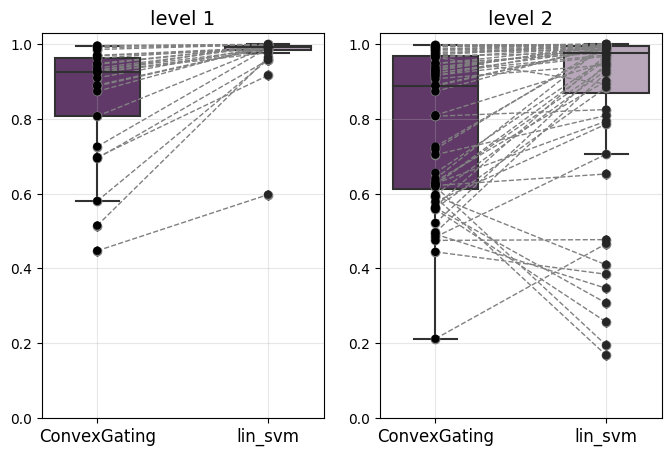

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV f1
sns.boxplot(data=comp_HIV_lvl1_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_f1)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_f1['f1_cg'][i], comp_HIV_lvl1_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_f1)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_f1['f1_cg'][i], comp_HIV_lvl2_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_HIV_f1.pdf',bbox_inches='tight')

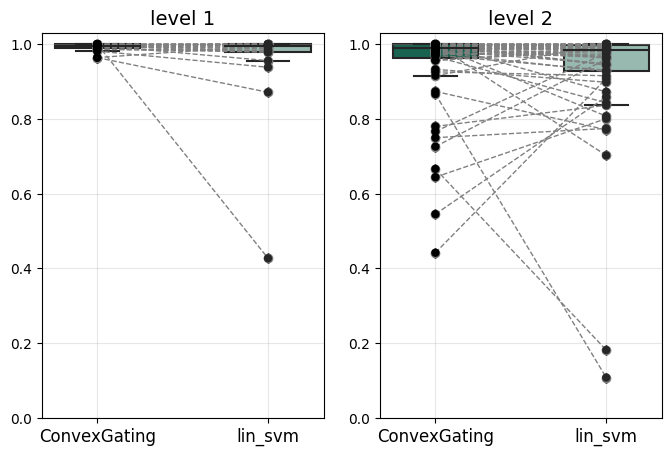

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV precision
sns.boxplot(data=comp_HIV_lvl1_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_precision)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_precision['precision_cg'][i], comp_HIV_lvl1_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_precision)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_precision['precision_cg'][i], comp_HIV_lvl2_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_HIV_precision.pdf',bbox_inches='tight')

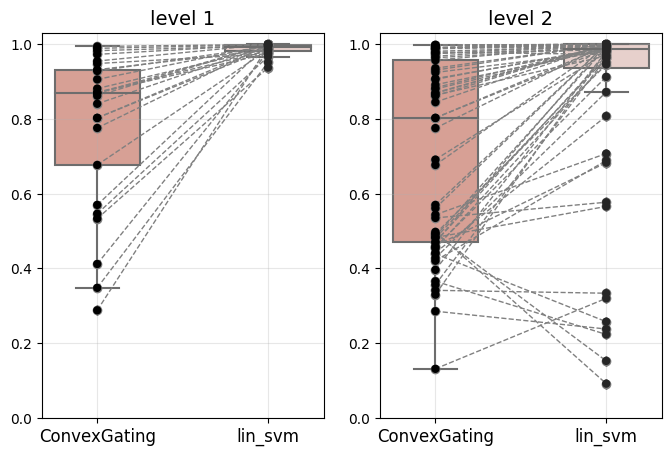

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV recall
sns.boxplot(data=comp_HIV_lvl1_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_recall)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_recall['recall_cg'][i], comp_HIV_lvl1_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_recall)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_recall['recall_cg'][i], comp_HIV_lvl2_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_lin_svm_HIV_recall.pdf',bbox_inches='tight')

In [32]:
columns = ['tool','panel','level','mean f1','mean precision','mean recall']

lin_svm_overview = pd.DataFrame(columns = ['tool','panel','level','mean f1','mean precision','mean recall'])

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','hofer','level 1',np.round(np.mean(comp_hofer_lvl1_f1['f1_lin_svm']),3),np.round(np.mean(comp_hofer_lvl1_precision['precision_lin_svm']),3),np.round(np.mean(comp_hofer_lvl1_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview =  lin_svm_overview.append(pd.DataFrame(['linear svm','hofer','level 2',np.round(np.mean(comp_hofer_lvl2_f1['f1_lin_svm']),3),np.round(np.mean(comp_hofer_lvl2_precision['precision_lin_svm']),3),np.round(np.mean(comp_hofer_lvl2_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','HIV','level 1',np.round(np.mean(comp_HIV_lvl1_f1['f1_lin_svm']),3),np.round(np.mean(comp_HIV_lvl1_precision['precision_lin_svm']),3),np.round(np.mean(comp_HIV_lvl1_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview =  lin_svm_overview.append(pd.DataFrame(['linear svm','HIV','level 2',np.round(np.mean(comp_HIV_lvl2_f1['f1_lin_svm']),3),np.round(np.mean(comp_HIV_lvl2_precision['precision_lin_svm']),3),np.round(np.mean(comp_HIV_lvl2_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 2',np.round(np.mean(comp_oetjen_lvl2_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl2_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl2_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 3',np.round(np.mean(comp_oetjen_lvl3_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl3_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl3_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 4',np.round(np.mean(comp_oetjen_lvl4_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl4_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl4_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 5',np.round(np.mean(comp_oetjen_lvl5_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl5_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl5_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview['panel'] = lin_svm_overview['panel'].replace('hofer', 'monocyte panel')

lin_svm_overview['panel'] = lin_svm_overview['panel'].replace('HIV', 'PBMC panel')

lin_svm_overview['panel'] = lin_svm_overview['panel'].replace('oetjen', 'cyTOF panel')

lin_svm_overview.to_csv('tables/Q04_lin_svm_mean_performance.csv')

# RBF svm

In [33]:
####oetjen

In [34]:
comp_oetjen_lvl2_f1 = oetjen_cg_lvl2.merge(oetjen_rbf_svm_lvl2, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_oetjen_lvl3_f1 = oetjen_cg_lvl3.merge(oetjen_rbf_svm_lvl3, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_oetjen_lvl4_f1 = oetjen_cg_lvl4.merge(oetjen_rbf_svm_lvl4, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_oetjen_lvl5_f1 = oetjen_cg_lvl5.merge(oetjen_rbf_svm_lvl5, on = 'ID')[['f1_rbf_svm','f1_cg']]

comp_oetjen_lvl2_precision = oetjen_cg_lvl2.merge(oetjen_rbf_svm_lvl2, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_oetjen_lvl3_precision = oetjen_cg_lvl3.merge(oetjen_rbf_svm_lvl3, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_oetjen_lvl4_precision = oetjen_cg_lvl4.merge(oetjen_rbf_svm_lvl4, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_oetjen_lvl5_precision = oetjen_cg_lvl5.merge(oetjen_rbf_svm_lvl5, on = 'ID')[['precision_rbf_svm','precision_cg']]

comp_oetjen_lvl2_recall = oetjen_cg_lvl2.merge(oetjen_rbf_svm_lvl2, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_oetjen_lvl3_recall = oetjen_cg_lvl3.merge(oetjen_rbf_svm_lvl3, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_oetjen_lvl4_recall = oetjen_cg_lvl4.merge(oetjen_rbf_svm_lvl4, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_oetjen_lvl5_recall = oetjen_cg_lvl5.merge(oetjen_rbf_svm_lvl5, on = 'ID')[['recall_rbf_svm','recall_cg']]

In [35]:
comp_oetjen_lvl2_f1 = oetjen_cg_lvl2.merge(oetjen_rbf_svm_lvl2, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_oetjen_lvl3_f1 = oetjen_cg_lvl3.merge(oetjen_rbf_svm_lvl3, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_oetjen_lvl4_f1 = oetjen_cg_lvl4.merge(oetjen_rbf_svm_lvl4, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_oetjen_lvl5_f1 = oetjen_cg_lvl5.merge(oetjen_rbf_svm_lvl5, on = 'ID')[['f1_rbf_svm','f1_cg']]

comp_oetjen_lvl2_precision = oetjen_cg_lvl2.merge(oetjen_rbf_svm_lvl2, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_oetjen_lvl3_precision = oetjen_cg_lvl3.merge(oetjen_rbf_svm_lvl3, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_oetjen_lvl4_precision = oetjen_cg_lvl4.merge(oetjen_rbf_svm_lvl4, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_oetjen_lvl5_precision = oetjen_cg_lvl5.merge(oetjen_rbf_svm_lvl5, on = 'ID')[['precision_rbf_svm','precision_cg']]

comp_oetjen_lvl2_recall = oetjen_cg_lvl2.merge(oetjen_rbf_svm_lvl2, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_oetjen_lvl3_recall = oetjen_cg_lvl3.merge(oetjen_rbf_svm_lvl3, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_oetjen_lvl4_recall = oetjen_cg_lvl4.merge(oetjen_rbf_svm_lvl4, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_oetjen_lvl5_recall = oetjen_cg_lvl5.merge(oetjen_rbf_svm_lvl5, on = 'ID')[['recall_rbf_svm','recall_cg']]

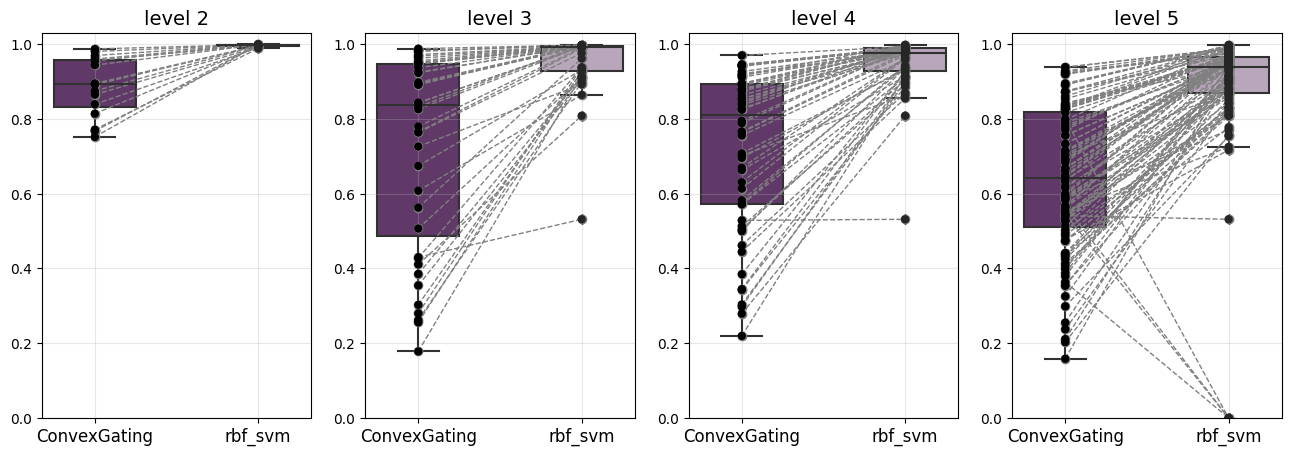

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen f1
sns.boxplot(data=comp_oetjen_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_f1)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_f1['f1_cg'][i], comp_oetjen_lvl2_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_f1)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_f1['f1_cg'][i], comp_oetjen_lvl3_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[2],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_f1)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_f1['f1_cg'][i], comp_oetjen_lvl4_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[3],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_f1)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_f1['f1_cg'][i], comp_oetjen_lvl5_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_oetjen_f1.pdf',bbox_inches='tight')

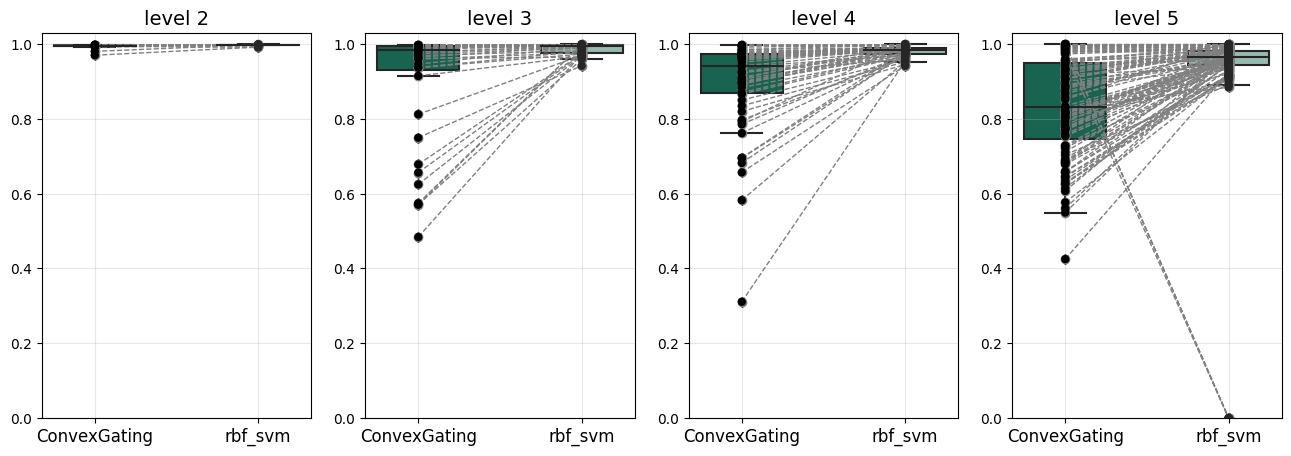

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen precision
sns.boxplot(data=comp_oetjen_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_precision)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_precision['precision_cg'][i], comp_oetjen_lvl2_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_precision)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_precision['precision_cg'][i], comp_oetjen_lvl3_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[2],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_precision)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_precision['precision_cg'][i], comp_oetjen_lvl4_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[3],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_precision)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_precision['precision_cg'][i], comp_oetjen_lvl5_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_oetjen_precision.pdf',bbox_inches='tight')

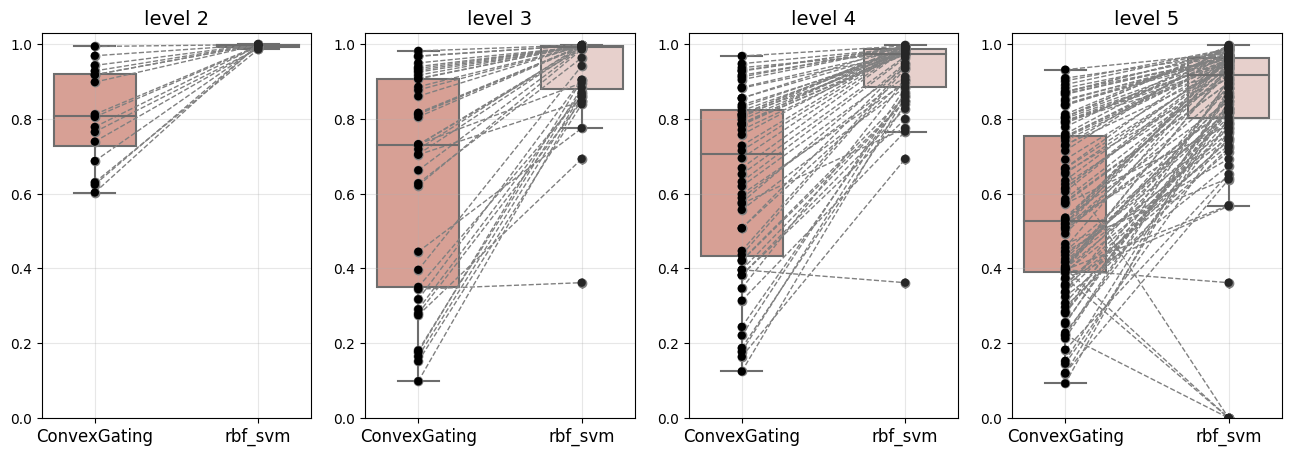

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen recall
sns.boxplot(data=comp_oetjen_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_recall)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_recall['recall_cg'][i], comp_oetjen_lvl2_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_recall)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_recall['recall_cg'][i], comp_oetjen_lvl3_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[2],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_recall)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_recall['recall_cg'][i], comp_oetjen_lvl4_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[3],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_recall)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_recall['recall_cg'][i], comp_oetjen_lvl5_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_oetjen_recall.pdf',bbox_inches='tight')

# Hofer

In [39]:
hofer_rbf_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\updated_Figure_4\\benchmark_tables\\'

hofer_rbf_svm_sub_lvl1 = pd.read_csv(hofer_rbf_svm_path +
                                   'mono_merge_annotated_cell_types_rbf_svm_sub_overview.csv',index_col = 0)
hofer_rbf_svm_sub_lvl1 = hofer_rbf_svm_sub_lvl1[hofer_rbf_svm_sub_lvl1['celltype'] != 'not annotated']

hofer_rbf_svm_sub_lvl1['cell_type'] = hofer_rbf_svm_sub_lvl1['celltype']
hofer_rbf_svm_sub_lvl1['level'] = 1
hofer_rbf_svm_lvl1 = add_ID(hofer_rbf_svm_sub_lvl1)
hofer_rbf_svm_lvl1 = hofer_rbf_svm_lvl1.rename(columns={'f1': 'f1_rbf_svm'})
hofer_rbf_svm_lvl1 = hofer_rbf_svm_lvl1.rename(columns={'recall': 'recall_rbf_svm'})
hofer_rbf_svm_lvl1 = hofer_rbf_svm_lvl1.rename(columns={'precision': 'precision_rbf_svm'})

hofer_rbf_svm_sub_lvl2 = pd.read_csv(hofer_rbf_svm_path +
                                   'mono_merge_annotated_cell_types_lvl2_rbf_svm_sub_overview.csv',index_col = 0)
hofer_rbf_svm_sub_lvl2 = hofer_rbf_svm_sub_lvl2[hofer_rbf_svm_sub_lvl2['celltype'] != 'not annotated']

hofer_rbf_svm_sub_lvl2['cell_type'] = hofer_rbf_svm_sub_lvl2['celltype']
hofer_rbf_svm_sub_lvl2['level'] = 2
hofer_rbf_svm_lvl2 = add_ID(hofer_rbf_svm_sub_lvl2)
hofer_rbf_svm_lvl2 = hofer_rbf_svm_lvl2.rename(columns={'f1': 'f1_rbf_svm'})
hofer_rbf_svm_lvl2 = hofer_rbf_svm_lvl2.rename(columns={'recall': 'recall_rbf_svm'})
hofer_rbf_svm_lvl2 = hofer_rbf_svm_lvl2.rename(columns={'precision': 'precision_rbf_svm'})

In [40]:
comp_hofer_lvl1_f1 = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'f1'].merge(hofer_rbf_svm_lvl1, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_hofer_lvl2_f1 = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'f1'].merge(hofer_rbf_svm_lvl2, on = 'ID')[['f1_rbf_svm','f1_cg']]

comp_hofer_lvl1_precision = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'precision'].merge(hofer_rbf_svm_lvl1, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_hofer_lvl2_precision = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'precision'].merge(hofer_rbf_svm_lvl2, on = 'ID')[['precision_rbf_svm','precision_cg']]

comp_hofer_lvl1_recall = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'recall'].merge(hofer_rbf_svm_lvl1, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_hofer_lvl2_recall = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'recall'].merge(hofer_rbf_svm_lvl2, on = 'ID')[['recall_rbf_svm','recall_cg']]

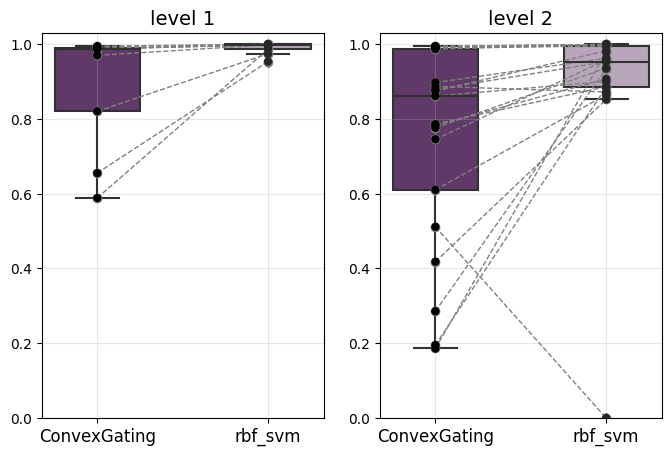

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer f1
sns.boxplot(data=comp_hofer_lvl1_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_f1)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_f1['f1_cg'][i], comp_hofer_lvl1_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_f1)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_f1['f1_cg'][i], comp_hofer_lvl2_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_hofer_f1.pdf',bbox_inches='tight')

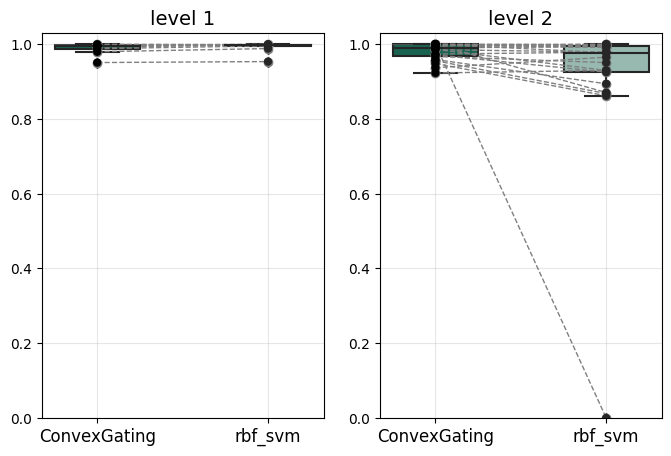

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer precision
sns.boxplot(data=comp_hofer_lvl1_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_precision)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_precision['precision_cg'][i], comp_hofer_lvl1_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_precision)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_precision['precision_cg'][i], comp_hofer_lvl2_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_hofer_precision.pdf',bbox_inches='tight')

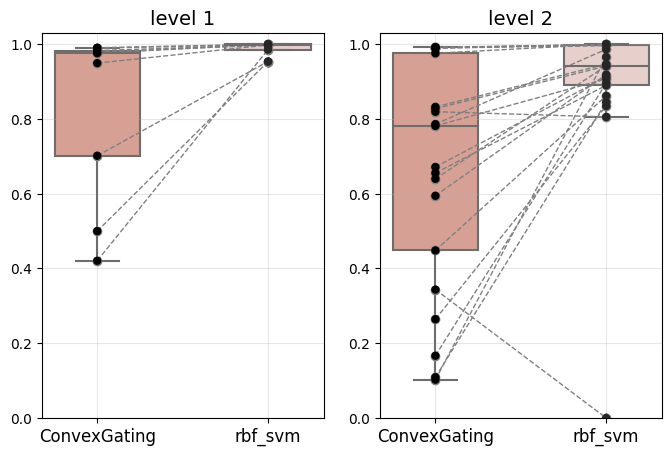

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer recall
sns.boxplot(data=comp_hofer_lvl1_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_recall)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_recall['recall_cg'][i], comp_hofer_lvl1_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_recall)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_recall['recall_cg'][i], comp_hofer_lvl2_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_hofer_recall.pdf',bbox_inches='tight')

# HIV

In [44]:
HIV_rbf_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\performance_rbfsvm\\svm_rbf\\HIV_data\\'

HIV_rbf_svm_sub_lvl1 = pd.read_csv(HIV_rbf_svm_path +
                                   'HIV_data_annotated_cell_type_lvl_1_sub_rbf_svm_overview.csv',index_col = 0)
HIV_rbf_svm_sub_lvl1 = HIV_rbf_svm_sub_lvl1[HIV_rbf_svm_sub_lvl1['celltype'] != 'not annotated']

HIV_rbf_svm_sub_lvl1['cell_type'] = HIV_rbf_svm_sub_lvl1['celltype']
HIV_rbf_svm_sub_lvl1['level'] = 1
HIV_rbf_svm_lvl1 = add_ID(HIV_rbf_svm_sub_lvl1)
HIV_rbf_svm_lvl1 = HIV_rbf_svm_lvl1.rename(columns={'f1': 'f1_rbf_svm'})
HIV_rbf_svm_lvl1 = HIV_rbf_svm_lvl1.rename(columns={'recall': 'recall_rbf_svm'})
HIV_rbf_svm_lvl1 = HIV_rbf_svm_lvl1.rename(columns={'precision': 'precision_rbf_svm'})

HIV_rbf_svm_sub_lvl2 = pd.read_csv(HIV_rbf_svm_path +
                                   'HIV_data_annotated_cell_type_lvl_2_sub_rbf_svm_overview.csv',index_col = 0)
HIV_rbf_svm_sub_lvl2 = HIV_rbf_svm_sub_lvl2[HIV_rbf_svm_sub_lvl2['celltype'] != 'not annotated']

HIV_rbf_svm_sub_lvl2['cell_type'] = HIV_rbf_svm_sub_lvl2['celltype']
HIV_rbf_svm_sub_lvl2['level'] = 2
HIV_rbf_svm_lvl2 = add_ID(HIV_rbf_svm_sub_lvl2)
HIV_rbf_svm_lvl2 = HIV_rbf_svm_lvl2.rename(columns={'f1': 'f1_rbf_svm'})
HIV_rbf_svm_lvl2 = HIV_rbf_svm_lvl2.rename(columns={'recall': 'recall_rbf_svm'})
HIV_rbf_svm_lvl2 = HIV_rbf_svm_lvl2.rename(columns={'precision': 'precision_rbf_svm'})

In [45]:
comp_HIV_lvl1_f1 = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'f1'].merge(HIV_rbf_svm_lvl1, on = 'ID')[['f1_rbf_svm','f1_cg']]
comp_HIV_lvl2_f1 = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'f1'].merge(HIV_rbf_svm_lvl2, on = 'ID')[['f1_rbf_svm','f1_cg']]

comp_HIV_lvl1_precision = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'precision'].merge(HIV_rbf_svm_lvl1, on = 'ID')[['precision_rbf_svm','precision_cg']]
comp_HIV_lvl2_precision = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'precision'].merge(HIV_rbf_svm_lvl2, on = 'ID')[['precision_rbf_svm','precision_cg']]

comp_HIV_lvl1_recall = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'recall'].merge(HIV_rbf_svm_lvl1, on = 'ID')[['recall_rbf_svm','recall_cg']]
comp_HIV_lvl2_recall = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'recall'].merge(HIV_rbf_svm_lvl2, on = 'ID')[['recall_rbf_svm','recall_cg']]

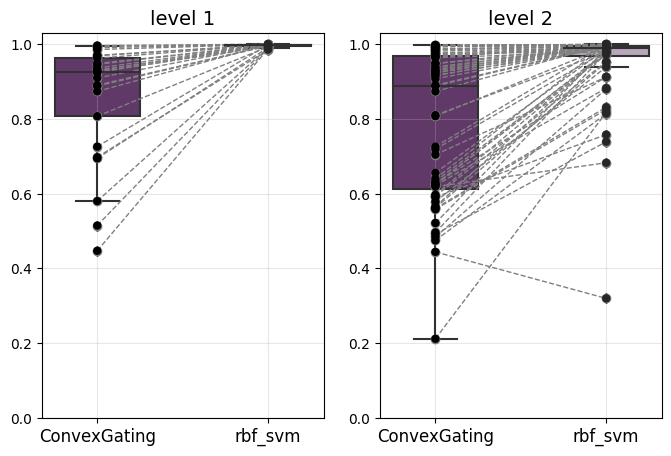

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV f1
sns.boxplot(data=comp_HIV_lvl1_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_f1)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_f1['f1_cg'][i], comp_HIV_lvl1_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_rbf_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_f1)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_f1['f1_cg'][i], comp_HIV_lvl2_f1['f1_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_HIV_f1.pdf',bbox_inches='tight')

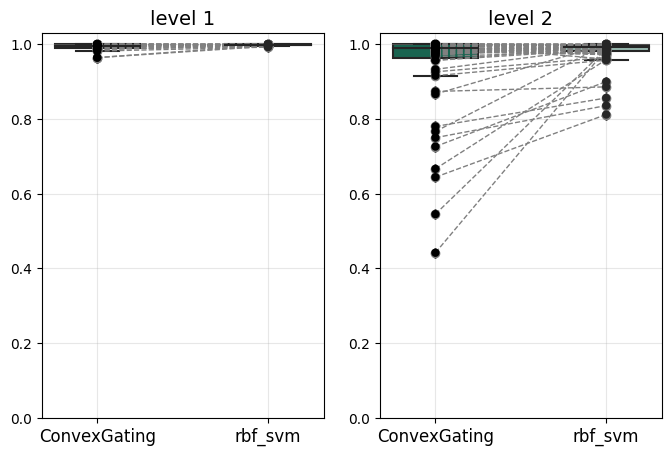

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV precision
sns.boxplot(data=comp_HIV_lvl1_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_precision)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_precision['precision_cg'][i], comp_HIV_lvl1_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_rbf_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_precision)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_precision['precision_cg'][i], comp_HIV_lvl2_precision['precision_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_HIV_precision.pdf',bbox_inches='tight')

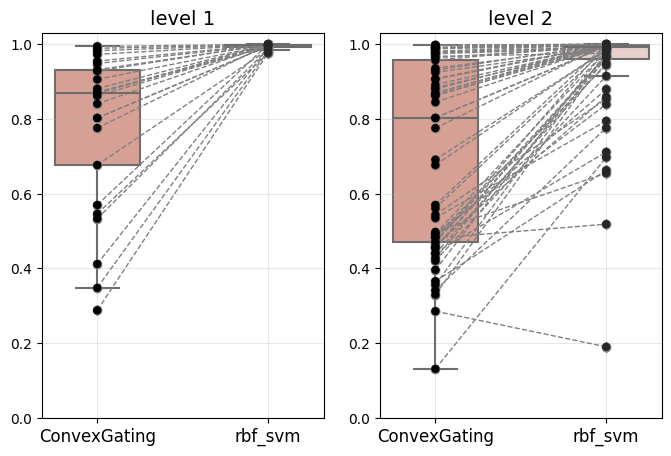

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV recall
sns.boxplot(data=comp_HIV_lvl1_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_recall)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_recall['recall_cg'][i], comp_HIV_lvl1_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_rbf_svm': 'rbf_svm'}),order = ['ConvexGating','rbf_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_rbf_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_recall)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_recall['recall_cg'][i], comp_HIV_lvl2_recall['recall_rbf_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig('figures/SQ04_cg_rbf_svm_HIV_recall.pdf',bbox_inches='tight')

#### Summary scores

In [49]:
columns = ['tool','panel','level','mean f1','mean precision','mean recall']

rbf_svm_overview = pd.DataFrame(columns = ['tool','panel','level','mean f1','mean precision','mean recall'])

rbf_svm_overview = rbf_svm_overview.append(pd.DataFrame(['rbf svm','hofer','level 1',np.round(np.mean(comp_hofer_lvl1_f1['f1_rbf_svm']),3),np.round(np.mean(comp_hofer_lvl1_precision['precision_rbf_svm']),3),np.round(np.mean(comp_hofer_lvl1_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview =  rbf_svm_overview.append(pd.DataFrame(['rbf svm','hofer','level 2',np.round(np.mean(comp_hofer_lvl2_f1['f1_rbf_svm']),3),np.round(np.mean(comp_hofer_lvl2_precision['precision_rbf_svm']),3),np.round(np.mean(comp_hofer_lvl2_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview = rbf_svm_overview.append(pd.DataFrame(['rbf svm','HIV','level 1',np.round(np.mean(comp_HIV_lvl1_f1['f1_rbf_svm']),3),np.round(np.mean(comp_HIV_lvl1_precision['precision_rbf_svm']),3),np.round(np.mean(comp_HIV_lvl1_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview =  rbf_svm_overview.append(pd.DataFrame(['rbf svm','HIV','level 2',np.round(np.mean(comp_HIV_lvl2_f1['f1_rbf_svm']),3),np.round(np.mean(comp_HIV_lvl2_precision['precision_rbf_svm']),3),np.round(np.mean(comp_HIV_lvl2_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview = rbf_svm_overview.append(pd.DataFrame(['rbf svm','oetjen','level 2',np.round(np.mean(comp_oetjen_lvl2_f1['f1_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl2_precision['precision_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl2_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview = rbf_svm_overview.append(pd.DataFrame(['rbf svm','oetjen','level 3',np.round(np.mean(comp_oetjen_lvl3_f1['f1_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl3_precision['precision_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl3_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview = rbf_svm_overview.append(pd.DataFrame(['rbf svm','oetjen','level 4',np.round(np.mean(comp_oetjen_lvl4_f1['f1_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl4_precision['precision_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl4_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview = rbf_svm_overview.append(pd.DataFrame(['rbf svm','oetjen','level 5',np.round(np.mean(comp_oetjen_lvl5_f1['f1_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl5_precision['precision_rbf_svm']),3),np.round(np.mean(comp_oetjen_lvl5_recall['recall_rbf_svm']),3)],index = columns).T)

rbf_svm_overview['panel'] = rbf_svm_overview['panel'].replace('hofer', 'monocyte panel')

rbf_svm_overview['panel'] = rbf_svm_overview['panel'].replace('HIV', 'PBMC panel')

rbf_svm_overview['panel'] = rbf_svm_overview['panel'].replace('oetjen', 'cyTOF panel')

rbf_svm_overview.to_csv('tables/Q04_rbf_svm_mean_performance.csv')

In [50]:
sc.logging.print_header()

scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.19.5 scipy==1.10.1 pandas==1.4.4 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [51]:
import pkg_resources
for package in pkg_resources.working_set:
     print(f"{package.key}=={package.version}")

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6
